## Notebook running GCN on the Cora Dataset

#### Sorry, The code is taken from https://stellargraph.readthedocs.io/en/stable/demos/node-classification/gcn-node-classification.html as I was having trouble getting my GCN to waork with the PUBmed Dataset

In [2]:
import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = sg.datasets.PubMedDiabetes()
display(HTML(dataset.description))
G, node_subjects = dataset.load()
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 19717, Edges: 44338

 Node types:
  paper: [19717]
    Features: float32 vector, length 500
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [44338]
        Weights: all 1 (default)
        Features: none


In [4]:
node_subjects.value_counts().to_frame()

,label
2,7875
3,7739
1,4103


In [5]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=500, test_size=None, stratify=node_subjects
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_subjects, train_size=500, test_size=None, stratify=test_subjects
)

train_subjects.value_counts().to_frame()

,label
2,200
3,196
1,104


In [6]:
target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(train_subjects)
val_targets = target_encoding.transform(val_subjects)
test_targets = target_encoding.transform(test_subjects)

generator = FullBatchNodeGenerator(G, method="gcn")
train_gen = generator.flow(train_subjects.index, train_targets)

gcn = GCN(
    layer_sizes=[32, 32], activations=["relu", "relu"], generator=generator, dropout=0.5
)

x_inp, x_out = gcn.in_out_tensors()
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

val_gen = generator.flow(val_subjects.index, val_targets)

Using GCN (local pooling) filters...


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)

In [8]:
history = model.fit(
    train_gen,
    epochs=200,
    validation_data=val_gen,
    verbose=2,
    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
    callbacks=[es_callback],
)

Epoch 1/200
1/1 - 1s - loss: 1.0985 - acc: 0.3680 - val_loss: 1.0815 - val_acc: 0.4840 - 732ms/epoch - 732ms/step
Epoch 2/200
1/1 - 0s - loss: 1.0811 - acc: 0.4860 - val_loss: 1.0630 - val_acc: 0.4840 - 155ms/epoch - 155ms/step
Epoch 3/200
1/1 - 0s - loss: 1.0617 - acc: 0.4740 - val_loss: 1.0434 - val_acc: 0.4820 - 157ms/epoch - 157ms/step
Epoch 4/200
1/1 - 0s - loss: 1.0405 - acc: 0.4840 - val_loss: 1.0234 - val_acc: 0.5000 - 160ms/epoch - 160ms/step
Epoch 5/200
1/1 - 0s - loss: 1.0167 - acc: 0.5060 - val_loss: 1.0025 - val_acc: 0.5320 - 156ms/epoch - 156ms/step
Epoch 6/200
1/1 - 0s - loss: 0.9996 - acc: 0.5200 - val_loss: 0.9791 - val_acc: 0.5680 - 158ms/epoch - 158ms/step
Epoch 7/200
1/1 - 0s - loss: 0.9705 - acc: 0.5800 - val_loss: 0.9507 - val_acc: 0.6100 - 157ms/epoch - 157ms/step
Epoch 8/200
1/1 - 0s - loss: 0.9381 - acc: 0.6120 - val_loss: 0.9176 - val_acc: 0.6420 - 157ms/epoch - 157ms/step
Epoch 9/200
1/1 - 0s - loss: 0.9090 - acc: 0.6360 - val_loss: 0.8839 - val_acc: 0.6640 -

Epoch 73/200
1/1 - 0s - loss: 0.1056 - acc: 0.9680 - val_loss: 0.5592 - val_acc: 0.8340 - 162ms/epoch - 162ms/step
Epoch 74/200
1/1 - 0s - loss: 0.1029 - acc: 0.9540 - val_loss: 0.5727 - val_acc: 0.8380 - 175ms/epoch - 175ms/step
Epoch 75/200
1/1 - 0s - loss: 0.0964 - acc: 0.9540 - val_loss: 0.5806 - val_acc: 0.8420 - 162ms/epoch - 162ms/step
Epoch 76/200
1/1 - 0s - loss: 0.0863 - acc: 0.9680 - val_loss: 0.5829 - val_acc: 0.8380 - 160ms/epoch - 160ms/step
Epoch 77/200
1/1 - 0s - loss: 0.0984 - acc: 0.9660 - val_loss: 0.5900 - val_acc: 0.8420 - 162ms/epoch - 162ms/step
Epoch 78/200
1/1 - 0s - loss: 0.0945 - acc: 0.9720 - val_loss: 0.5956 - val_acc: 0.8360 - 161ms/epoch - 161ms/step
Epoch 79/200
1/1 - 0s - loss: 0.1159 - acc: 0.9520 - val_loss: 0.5952 - val_acc: 0.8400 - 171ms/epoch - 171ms/step
Epoch 80/200
1/1 - 0s - loss: 0.0998 - acc: 0.9740 - val_loss: 0.5975 - val_acc: 0.8360 - 170ms/epoch - 170ms/step
Epoch 81/200
1/1 - 0s - loss: 0.0937 - acc: 0.9680 - val_loss: 0.6027 - val_acc:

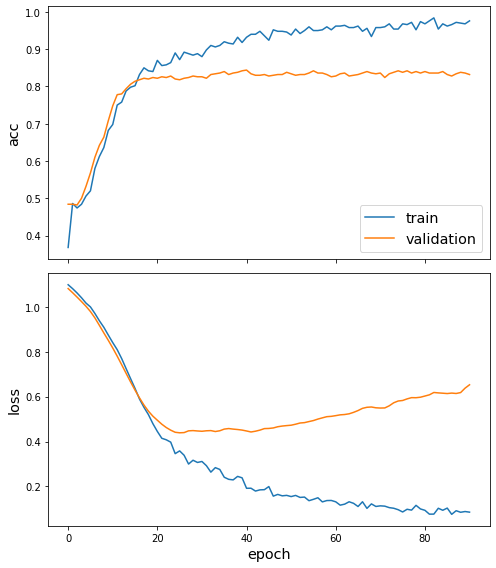

In [9]:
sg.utils.plot_history(history)

In [10]:
test_gen = generator.flow(test_subjects.index, test_targets)

In [11]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 68ms/step - loss: 0.4548 - acc: 0.8392

Test Set Metrics:
	loss: 0.4548
	acc: 0.8392
